In [121]:
import matplotlib.pyplot as plt
import networkx as nx
import csv

# Establish variables to be filled with public transport data
stops = {}
stopsOnTrip = {}
routes = {}

# Load metadata about each stop (hållplats) in Uppsala
with open('./gtfs_static_data_ul/stops.csv') as file:
    reader = csv.DictReader(file)
    # Create dictionary key for each row in stops.csv with values on name, latitude and longitude
    for row in reader:
        stops[row['stop_id']] = {'stop_id': row['stop_id'], 'stop_name': row['stop_name'],
                                 'stop_lat': row['stop_lat'], 'stop_lon': row['stop_lon']}

# Load data on when all trips (avgångar) pass each stop (hållplats) in Uppsala
with open('./gtfs_static_data_ul/stop_times.csv') as file:
    reader1 = csv.DictReader(file)
    # Loops through stop_times.csv and creates dictionary with stops per unique trip
    for row in reader1:
        if row['trip_id'] not in stopsOnTrip:
            stopsOnTrip[row['trip_id']] = [stops[row['stop_id']]]
        if row['trip_id'] in stopsOnTrip:
            stopsOnTrip[row['trip_id']].append(stops[row['stop_id']])

# Load data on all trips (avgångar) in Uppsala
with open('./gtfs_static_data_ul/trips.csv') as file:
    reader2 = csv.DictReader(file)
    # Loops through trips.csv and creates dictionary with the first trip per unique route
    for row in reader2:
        if row['route_id'] not in routes:
            routes[row['route_id']] = stopsOnTrip[row['trip_id']]

In [248]:
import math

weightFactor=500

def createGraphFromRoute(id):
    H = nx.DiGraph()
    for i,stop in enumerate(routes[id]):
        if i+1 < len(routes[id]):
            edge_lat_diff_squared=(float(routes[id][i+1]['stop_lat'])-float(routes[id][i]['stop_lat']))**2
            edge_lon_diff_squared=(float(routes[id][i+1]['stop_lon'])-float(routes[id][i]['stop_lon']))**2
            distance_formula=math.sqrt(edge_lat_diff_squared+edge_lon_diff_squared)
            print(i,i+1,routes[id][i]['stop_name'],'distance_to_next',distance_formula)
            H.add_edge(routes[id][i]['stop_id'],routes[id][i+1]['stop_id'],weight=distance_formula*weightFactor)
    nx.draw(H, with_labels=True)

0 1 Bålsta station distance_to_next 0.0
1 2 Bålsta station distance_to_next 0.012805391872171348
2 3 Kalmar livs (Bålsta) (Håbo) distance_to_next 0.01082804654589485
3 4 Draget (Bålsta) (Håbo) distance_to_next 0.03180380810531844
4 5 Ekedal (Bro) (Upplands Bro) distance_to_next 0.020973796342102096
5 6 Lunda (Upplands Bro) distance_to_next 0.005015260711070349
6 7 Lövhagen (Sigtuna) distance_to_next 0.007800449474230089
7 8 Nedergården (Upplands Bro) distance_to_next 0.00873242950157584
8 9 Killinge (Sigtuna) distance_to_next 0.011576178039403747
9 10 Norränge (Upplands Bro) distance_to_next 0.013986646345711102
10 11 Kålsta (Upplands Bro) distance_to_next 0.0058310817178309
11 12 Erikssundsvägen (Upplands Bro) distance_to_next 0.008806412436399964
12 13 Håtunaholm (Upplands Bro) distance_to_next 0.006202400825487577
13 14 Erikssund (Sigtuna) distance_to_next 0.013533945840000507
14 15 Rosenhill (Sigtuna) distance_to_next 0.013107781581943137
15 16 Billbyvägen (Sigtuna) distance_to_nex

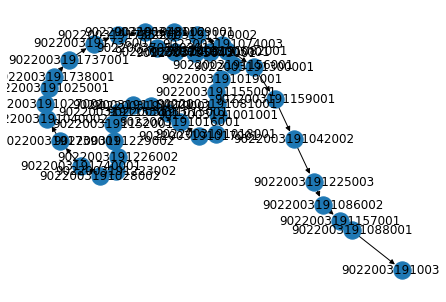

In [249]:
# Uppsala – Järva krog: 9011001059300000

createGraphFromRoute('9011001057900000')